# PSD Parameter Exploration

Explore how the `overlap` parameter in `psd_welch` affects the power
spectral density estimate. The default overlap is 0.25 (25%); the
Wolpert et al. (2020) convention uses 0.75 (75%).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
egg = gp.load_egg()
best_idx, _, _, _ = gp.select_best_channel(egg["signal"], egg["sfreq"])
best_signal = egg["signal"][best_idx]
sfreq = egg["sfreq"]

## Effect of Overlap

Higher overlap gives smoother PSD estimates (more averaging) at the
cost of some spectral leakage. For short recordings, higher overlap
is recommended.

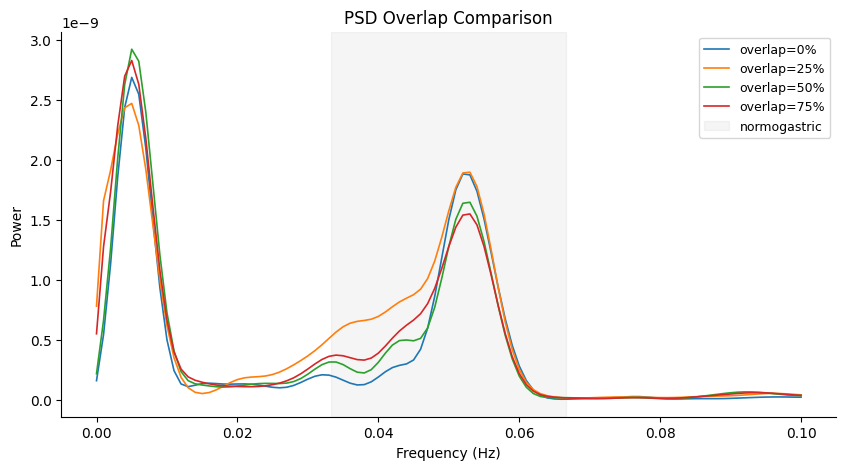

In [3]:
overlaps = [0.0, 0.25, 0.50, 0.75]

fig, ax = plt.subplots(figsize=(10, 5))
for ov in overlaps:
    freqs, psd = gp.psd_welch(best_signal, sfreq, fmin=0.0, fmax=0.1, overlap=ov)
    ax.plot(freqs, psd, label=f"overlap={ov:.0%}", linewidth=1.2)

ax.axvspan(gp.NORMOGASTRIA.f_lo, gp.NORMOGASTRIA.f_hi,
           alpha=0.08, color="grey", label="normogastric")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power")
ax.set_title("PSD Overlap Comparison")
ax.legend(fontsize=9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

## Effect of Frequency Range

The `fmin` and `fmax` parameters control which portion of the PSD
is returned. The underlying computation always uses the full range
and then trims.

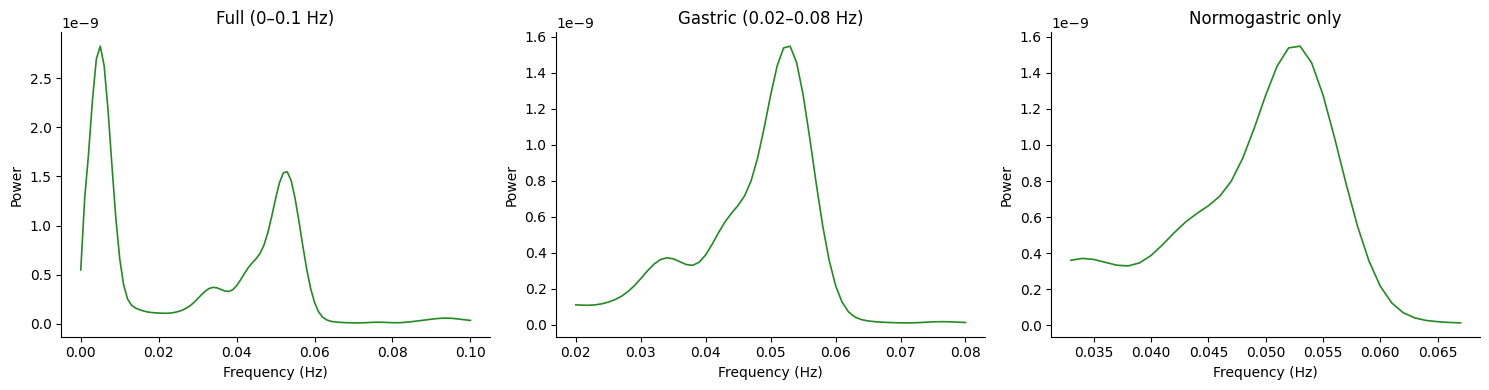

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ranges = [(0.0, 0.1, "Full (0–0.1 Hz)"),
          (0.02, 0.08, "Gastric (0.02–0.08 Hz)"),
          (0.033, 0.067, "Normogastric only")]

for ax, (fmin, fmax, title) in zip(axes, ranges):
    f, p = gp.psd_welch(best_signal, sfreq, fmin=fmin, fmax=fmax, overlap=0.75)
    ax.plot(f, p, color="forestgreen", linewidth=1.2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power")
    ax.set_title(title)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

fig.tight_layout()
plt.show()

**See also:** [PSD Visualization](plot_psd.ipynb),
[Channel Selection](channel_selection.ipynb)